### Problem Description

 "We want to build a model for a Resturant to predict if the reviews of the customers are positive or negative ,so we downloaded a dataset from kaggle and read it ,chose columns from which give us information benifit us and put them in a new dataframe . we cleaned the dataframe " dropped duplicates and Removed stop words " and applied stemming , convert scors to binary categories " score >=3 = 1, score <3=0 " . but before the pre procissing we chose a sample from data to work on it because data set is very big and waste alot of time while running any code . we have found positive labels greater than nagative labels by plot ,so we make Data balanced to choose positive labels equal negative labels to predict better. Then we split data set to training set and test set , vectorized them  ,then initialized our model , fitted training set and transformed training set and test set to build our model .  saved it for Deployment then loaded again and tested "  ... also mention the link of the dataset https://www.kaggle.com/snap/amazon-fine-food-reviews

### Import Packages

In [1]:
#!pip3 install gensim==3.8.3

In [2]:
# Add environment Packages paths to conda
import os, sys
# env_name = "food_review"
# sys.path.append(f"C:\\Environments\\{env_name}\\lib\\site-packages\\")

import pandas as pd
import numpy as np

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
from nltk.corpus import stopwords # Stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

### Read Dataset

In [3]:
%%time
df = pd.read_csv('Reviews.csv')

Wall time: 19.2 s


In [4]:
f"{df.shape[0]:,} Review"

'568,454 Review'

In [5]:
cols = ['Text', 'Score']
df_text = df[cols].copy()
df_text.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


### Drop Duplicates
Save the Cleaned data-frame also with the variable `df_text`

In [6]:
## Write your code here
df_text=df_text.drop_duplicates()
df_text =df_text.reset_index(drop=True)
df_text.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [7]:
df_text.shape

(393675, 2)

### Target Variable Pre-Processing
`target` will be 
 - 0 if score < 3 
 - 1 otherwise

In [8]:
df_text["target"] = df_text.Score.apply(lambda x : 0 if x<3 else 1) #np.where(df_text['Score']>=3, '1', np.where(df_text['Score']<3, '0',3))
df_text.head()

,Text,Score,target
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


#### Plot Countplot for target Variable

<AxesSubplot:xlabel='target', ylabel='count'>

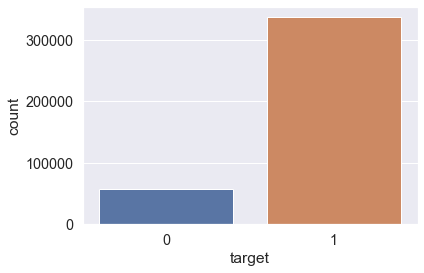

In [9]:
df_sorted= df_text.sort_values('target')
sns.countplot( x='target', data=df_sorted)

Notice how such variance is huge ...   
Then we need to down-sample such data ... by which both the positive and negative classes are balanced.

### Balance Data Target

In [10]:
# Sample from positive reviews Same number of negative reviews
NEG_N = df_text.target.value_counts()[0]
NEG_N

57084

In [11]:
df_pos = df_text[df_text['target'] == 1]['Text'].sample(NEG_N, replace=False)
df_pos

31101     These flowers are large, fragrant, and BEAUTIF...
262907    This tea is very nice.  I love all the China M...
23777     We have a 13 month old, 100+ pound Rottweiler ...
307561    I love this carousel. It barely takes up any c...
323737    I ordered a 6-pack of these in Feb and was so ...
                                ...                        
18781     Loved it! If you like cotton candy, this is a ...
83559     These crackers are delicious. They are a bit s...
196071    My family just loves the Maxwell House Interna...
243611    I am very happy with this garden so happy I am...
345989    I love these vanilla beans.  Very soft and ful...
Name: Text, Length: 57084, dtype: object

In [12]:
df_text_balanced = pd.concat([df_text.iloc[df_pos.index], df_text[df_text.target == 0]])
df_text_balanced.shape

(114168, 3)

<AxesSubplot:xlabel='target', ylabel='count'>

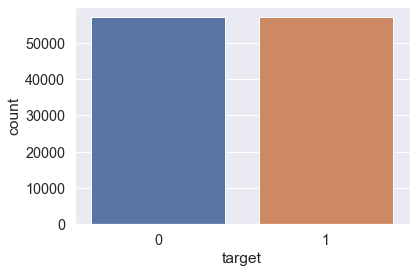

In [13]:
## PLot the target again after balancing
## Write your code here
df_sorted= df_text_balanced.sort_values('target')
sns.countplot( x='target', data=df_sorted)

### Text Pre-Processing

In [14]:
df_sample=df_text_balanced.sample(5000)
df_sample.to_csv(r'D:\Data science training\df_sample.csv',index=False)

In [15]:
df_sample=pd.read_csv('D:\Data science training\df_sample.csv')
df_sample

,Text,Score,target
0,Don't buy this if you like Starbuck's coffee. ...,5,1
1,"Not a bad product, just a bit on the thin side...",3,1
2,This was my first time using chia seeds. I am...,5,1
3,"Beans arrived quickly, and although they are w...",5,1
4,"The grass sprouted quickly, with a great germi...",5,1
...,...,...,...
4995,These brownies are amazing and addictive... an...,5,1
4996,I think the person equates gluten with wheat. ...,1,0
4997,"placed 2 orders, came in with 2 seperated brow...",1,0
4998,The beans arrived good packed. Filled my Vario...,1,0


import libraries

In [16]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CASABLANCA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


make texts in lower case

In [17]:
df_sample['Text']=df_sample['Text'].str.lower()
df_sample.head()

,Text,Score,target
0,don't buy this if you like starbuck's coffee. ...,5,1
1,"not a bad product, just a bit on the thin side...",3,1
2,this was my first time using chia seeds. i am...,5,1
3,"beans arrived quickly, and although they are w...",5,1
4,"the grass sprouted quickly, with a great germi...",5,1


split the review text into individual words 

In [18]:
def identify_tokens(row):
    review = row['Text']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df_sample['Text'] = df_sample.apply(identify_tokens, axis=1)
df_sample.head()

,Text,Score,target
0,"[do, buy, this, if, you, like, starbuck, coffe...",5,1
1,"[not, a, bad, product, just, a, bit, on, the, ...",3,1
2,"[this, was, my, first, time, using, chia, seed...",5,1
3,"[beans, arrived, quickly, and, although, they,...",5,1
4,"[the, grass, sprouted, quickly, with, a, great...",5,1


Stemming

In [19]:
def stem_list(row):
    my_list = row['Text']
    stemmed_list = [PorterStemmer().stem(word) for word in my_list]
    return (stemmed_list)

df_sample['Text'] = df_sample.apply(stem_list, axis=1)
df_sample.head()

,Text,Score,target
0,"[do, buy, thi, if, you, like, starbuck, coffe,...",5,1
1,"[not, a, bad, product, just, a, bit, on, the, ...",3,1
2,"[thi, wa, my, first, time, use, chia, seed, i,...",5,1
3,"[bean, arriv, quickli, and, although, they, ar...",5,1
4,"[the, grass, sprout, quickli, with, a, great, ...",5,1


Removing stop words

In [20]:
def remove_stops(row):
    my_list = row['Text']
    meaningful_words = [w for w in my_list if not w in stop]
    return (meaningful_words)

df_sample['Text'] = df_sample.apply(remove_stops, axis=1)
df_sample.head()

,Text,Score,target
0,"[buy, thi, like, starbuck, coffe, love, thi, b...",5,1
1,"[bad, product, bit, thin, side, would, best, d...",3,1
2,"[thi, wa, first, time, use, chia, seed, veri, ...",5,1
3,"[bean, arriv, quickli, although, wrap, ziploc,...",5,1
4,"[grass, sprout, quickli, great, germin, rate, ...",5,1


Rejoin words

In [21]:
def rejoin_words(row):
    my_list = row['Text']
    joined_words = ( " ".join(my_list))
    return joined_words

df_sample['Text'] = df_sample.apply(rejoin_words, axis=1)
df_sample.head()

,Text,Score,target
0,buy thi like starbuck coffe love thi becaus mi...,5,1
1,bad product bit thin side would best dog lb li...,3,1
2,thi wa first time use chia seed veri specif di...,5,1
3,bean arriv quickli although wrap ziploc plasti...,5,1
4,grass sprout quickli great germin rate cat lov...,5,1


### Split Test & Training Data

In [37]:
X = df_sample['Text'] ## Write your code here
y = df_sample['target']  ## Write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Text Embedding
 - Use `TfidfVectorizer`
 - `fit` on the training data only
 - `transform` on training and test 

In [38]:
## TFIDF embedding for the Description
vectorizer = TfidfVectorizer() ## Write your code here
# fit on training (such vectorizer will be saved for deployment)
vectorizer_tfidf = vectorizer.fit(X_train) ## Write your code here
# transform on training data
X_train = vectorizer_tfidf.fit_transform(X_train) ## Write your code here
# transform on testing data
X_test = vectorizer.transform(X_test) ## Write your code here

In [39]:
# See the dimensions of your data embeddings before entering to the model
X_train.shape, X_test.shape

((3500, 8453), (1500, 8453))

### Modelling

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

##### Sklearn framework steps
 - init
 - fit
 - predict

In [41]:
## initialize your Model
clf = RandomForestClassifier() 
# Fit your Model on the Training Dataset
clf.fit(X_train,y_train)
# Predict on Test data
preds = clf.predict(X_test)
# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 80.13%


### Raw Instance Prediction

In [155]:
def review_cleaned(review):
    word_list=nltk.word_tokenize(review)
    clean_list=[]
    for word in word_list:
        if word.lower() not in stop :
            stemmed=PorterStemmer().stem(word)
            clean_list.append(stemmed)
    return " ".join(clean_list)        

In [156]:
def raw_test(review, model, vectorizer):
    # Clean Review
    review_c = review_cleaned(review)
    # Embed review using tf-idf vectorizer
    embedding = vectorizer.transform([review_c])
    # Predict using your model
    prediction = model.predict(embedding)
    # Return the Sentiment Prediction
    return "Positive" if prediction == 1 else "Negative"

In [157]:
review_1 = "That's a good Dish, Good Job"
review_2 = "That's the worst Dish ever tasted"

In [158]:
raw_test(review_1, clf, vectorizer_tfidf)

'Positive'

In [159]:
raw_test(review_2, clf, vectorizer_tfidf)

'Negative'

### Saving Models for Deployment

In [46]:
import pickle

In [100]:
model_name = 'rf_model.pk'
vectorizer_name = 'tfidf_vectorizer.pk'
model_path = os.path.join('/', model_name)
vect_path = os.path.join('/', vectorizer_name)

model=pickle.dump(clf, open(model_name, 'wb'))
vect=pickle.dump(vectorizer, open(vectorizer_name, 'wb'))

### Load model Again and test them

In [101]:
loaded_model = pickle.load(open('rf_model.pk', 'rb'))
loaded_vect = pickle.load(open('tfidf_vectorizer.pk', 'rb'))

In [102]:
raw_test(review_1, loaded_model, loaded_vect)

'Positive'

In [103]:
raw_test(review_2, loaded_model, loaded_vect)

'Negative'

# Great Job !
### Now Deploy your ML model using Streamlit Framework

In [104]:
!pip install streamlit

In [105]:
import streamlit as st

ImportError: DLL load failed while importing lib: The specified procedure could not be found.

I’ve tried alot to fix this error ,but useless

In [106]:
!streamlit run deployment.py

Traceback (most recent call last):
  File "C:\Users\CASABLANCA\anaconda3\Scripts\streamlit-script.py", line 5, in <module>
    from streamlit.cli import main
  File "C:\Users\CASABLANCA\anaconda3\lib\site-packages\streamlit\__init__.py", line 75, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "C:\Users\CASABLANCA\anaconda3\lib\site-packages\streamlit\delta_generator.py", line 19, in <module>
    from streamlit import caching
  File "C:\Users\CASABLANCA\anaconda3\lib\site-packages\streamlit\caching.py", line 38, in <module>
    from streamlit.hashing import update_hash, HashFuncsDict
  File "C:\Users\CASABLANCA\anaconda3\lib\site-packages\streamlit\hashing.py", line 38, in <module>
    from streamlit import type_util
  File "C:\Users\CASABLANCA\anaconda3\lib\site-packages\streamlit\type_util.py", line 22, in <module>
    import pyarrow as pa
  File "C:\Users\CASABLANCA\anaconda3\lib\site-packages\pyarrow\__init__.py", line 63, in <module>
